## Great Learning Academy

##### Appy Adaboost Ensemble Algorithm for the same data and print the accuracy

In [41]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(wine.data, columns = wine.feature_names)
data['Target'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [43]:
# print datatypes of each columns and shape of the dataset

data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
Target                            int64
dtype: object

In [44]:
data.shape, data.size

((178, 14), 2492)

In [45]:
### printing descriptive statistics of each column

data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


 - Using univariate analysis check the individual attritubutes for their basic statistic such as central values, spread, tails etc.
 - observations from any two attributes

/home/kobby/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Target', ylabel='count'>

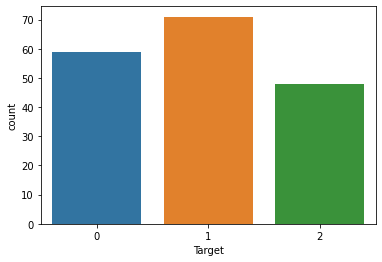

In [46]:
# plot the grapds of different varibale to see the distribution
sns.countplot(data['Target'])

- From above it can be seen that the target variables are not imbalanced. Hence the features can explain the responses accordingly

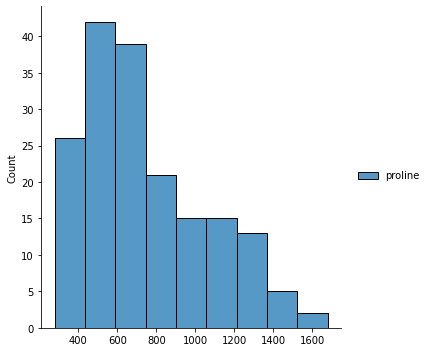

In [101]:
sns.displot(data[['proline']])

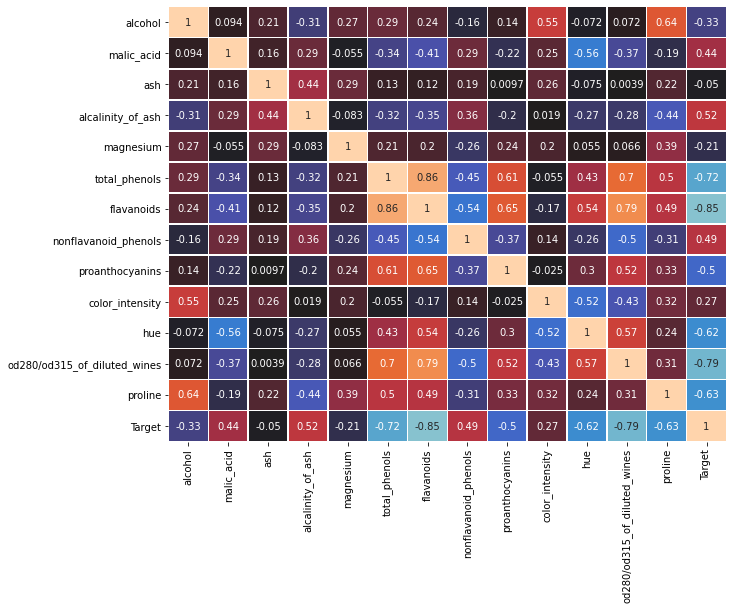

In [48]:
##### Use correlation method to see the relationship between the different variables and state your insights

plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),
           annot = True,
           linewidths = .5,
           center = 0,
           cbar = False,
           cmap = None)
plt.show()

In [49]:
# level of Y/target variables 

data[['Target']].value_counts()

Target
1         71
0         59
2         48
dtype: int64

 - in our case we do not have target imbalance issue therefore we do not do combination of target variables.
 - however the sample code will help next time of such issues:
 data['Target'] = data['Target'].replace(x,y)
 where x and y are the various target varibles for combination by the replace function

In [50]:
# We now split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target', axis =1), 
                                                    data.Target, test_size = 0.2, random_state = 4)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [67]:
#### Creat the decision tree model using 'entropy' method of finding the split columns and fit it to the training data

model_entropy = DecisionTreeClassifier(criterion = 'entropy')
model_entropy.fit(X_train, y_train)
model_score = model_entropy.score(X_test, y_test) # validation performance
model_score

0.9722222222222222

In [52]:
model_entropy.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2])

In [53]:
y_test == model_entropy.predict(X_test)

163     True
142     True
14      True
45      True
81      True
157     True
26      True
74     False
1       True
76      True
90      True
18      True
170     True
166     True
33      True
105     True
48      True
102     True
93      True
156     True
91      True
165     True
124     True
168     True
6       True
134     True
69      True
92      True
143     True
144     True
47      True
77      True
12      True
113     True
167     True
140     True
Name: Target, dtype: bool

- Now in case overfitting issues there would be the need for regularization of your model and with decision tree in question your best of choice would be pruining method; here is how it is done. You'd would choose a to reduce the number of nodes by dividing the number of features for the 'max_depth' parameter. # let's say you've 12 features overall your max_depth parameter would be 12/2. Fortunately for us, our model seem to work perfect with our type of data.

In [72]:
Dataframe = pd.DataFrame({'Method': ['Decision Tree'], 'accuracy': [model_score]})
Dataframe

,Method,accuracy
0,Decision Tree,0.972222


In [54]:
#pip install graphviz

In [55]:
### Visualizing the TREE. To work on this later 

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus as pdp
import graphviz as gv


In [56]:
import os
os.getcwd()

'/home/kobby/Desktop'

In [57]:
!pip install graphviz

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.


In [58]:
%matplotlib inline
xvar = data.drop('Target', axis = 1)
feature_cols = xvar.columns

dot_data = StringIO()
export_graphviz(model_entropy, out_file = dot_data, filled=True, rounded=True,
               special_characters=True,feature_names=feature_cols, class_names=None)
graph = pdp.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('model_entropy.png')
#Image(graph.create_png())

- When the tree is regularized, overfitting is reduced but there is no increase in accuracy

In [60]:
### feature importance 
feat_importance = model_entropy.tree_.compute_feature_importances(normalize = False)

dic = dict(zip(feature_cols, model_entropy.feature_importances_))
dic_frame = pd.DataFrame.from_dict(dic, orient = 'index')
dic_frame.sort_values(by =0, ascending = False)

,0
flavanoids,0.410652
proline,0.337585
color_intensity,0.115770
magnesium,0.089224
alcalinity_of_ash,0.029849
malic_acid,0.016919
alcohol,0.000000
ash,0.000000
total_phenols,0.000000
nonflavanoid_phenols,0.000000


In [70]:
### Applying randomforestclassifier

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train,y_train)
test_score =rf.score(X_test,y_test)

In [79]:
Dataframe2 = pd.DataFrame({'Method': ['RandomForestClassifier'], 'accuracy': [test_score]})
Dataframe3 = pd.concat([Dataframe, Dataframe2])
Dataframe3

,Method,accuracy
0,Decision Tree,0.972222
0,RandomForestClassifier,1.000000


### Apply AdaBoost Ensemble algorithm

In [95]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state = 22)

                         
Ada.fit(X_train, y_train)
Ada.score(X_test, y_test)

0.8888888888888888

In [87]:
#### make prediction and calculate the score

#ada_pred = Ada.predict()
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_accuracy

0.8888888888888888

In [88]:
##### create a dataframe for the various models and their accuracies respectively

Dataframe4 = pd.DataFrame({'Method': ['Adaboost'], 'accuracy': [ada_accuracy]})
results = pd.concat([Dataframe4, Dataframe3])
results

,Method,accuracy
0,Adaboost,0.888889
0,Decision Tree,0.972222
0,RandomForestClassifier,1.000000


- Adaboost perform a little lower than Decision Tree so far.

In [96]:
### Apply Bagging Classifier Algorithm and print Accuracy

from sklearn.ensemble import BaggingClassifier
bag= BaggingClassifier(n_estimators = 10, max_samples = .7, bootstrap = True, oob_score = True, random_state = 22)
bag.fit(X_train,y_train)
bag_score=bag.score(X_test, y_test)
# bag_score = accuracy_score(X_test, y_test)


In [97]:
Dataframe5 = pd.DataFrame({'Method': ['Bagging'], 'accuracy': [bag_score]})
dataframe = pd.concat([Dataframe5, results])
dataframe

,Method,accuracy
0,Bagging,0.944444
0,Adaboost,0.888889
0,Decision Tree,0.972222
0,RandomForestClassifier,1.000000


In [99]:
### Apply Gradient Boosting Classifier Algorithm for same data

from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators =10, learning_rate = 0.1, random_state = 4)
GBC.fit(X_train, y_train)
score = GBC.score(X_test, y_test)

In [100]:
Dataframe6 = pd.DataFrame({'Method': ['GBC'], 'accuracy': [score]})
New_frame = pd.concat([Dataframe6, dataframe])
New_frame

,Method,accuracy
0,GBC,0.972222
0,Bagging,0.944444
0,Adaboost,0.888889
0,Decision Tree,0.972222
0,RandomForestClassifier,1.000000
